# Preprocessing with EDA

## Import Library

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from time import sleep
import json, os
import csv
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

## Import CSV

In [2]:
from pandas import read_csv


garmin_df = read_csv("../data/garmin_df.csv")
applew_df = read_csv("../data/applew_df.csv")

In [3]:
garmin_df["subreddit"] = "garmin"

In [4]:
garmin_df

,vote,title,text,date,subreddit
0,1,Fix My Garmin - Garmin Repair and Sat Nav Repa...,NaN,2012-12-28,garmin
1,1,How To Handle The Garmin eTrex 20,NaN,2013-04-30,garmin
2,4,Hey guys,[removed],2014-02-12,garmin
3,1,Garmin's New All-In-One Dashcam-Navigator Help...,NaN,2015-04-24,garmin
4,1,Garmin Vivosmart - Black (Large) Reviews,NaN,2015-06-26,garmin
...,...,...,...,...,...
3668,6,Noob question... Apple Watch or Garmin..,[deleted],2019-06-02,garmin
3669,0,Fenix 5: Rusty screws and charging port after ...,"Hey everyone,\n\n\nI took my new Fenix 5 out f...",2019-06-02,garmin
3670,3,"Upgrade from Fenix 3, 245M or 945 ?",Hi! I have been training like three years with...,2019-06-03,garmin
3671,12,HRM-Tri begins to report low HR over the cours...,NaN,2019-06-03,garmin


In [5]:
applew_df["subreddit"] = "applewatch"

In [6]:
applew_df

,vote,title,text,date,subreddit
0,1,Apple Insider: FoxConn in development for iWatch,NaN,2013-02-11,applewatch
1,1,WP: Speculation and wish lists,NaN,2013-02-11,applewatch
2,1,Take my money.,NaN,2013-02-11,applewatch
3,8,"AW designed for daily charging, supports lefties",NaN,2014-09-14,applewatch
4,6,Hands on AppleWatch,NaN,2014-09-16,applewatch
...,...,...,...,...,...
2718,5,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,2015-07-11,applewatch
2719,0,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,2015-07-11,applewatch
2720,3,iPhone 6+ Beta 3 and AW Beta 2-- Can't pair,[deleted],2015-07-11,applewatch
2721,0,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,2015-07-11,applewatch


## Concat Data Frame

In [7]:
concat_watch_df = pd.concat([garmin_df, applew_df],axis = 0)
concat_watch_df

,vote,title,text,date,subreddit
0,1,Fix My Garmin - Garmin Repair and Sat Nav Repa...,NaN,2012-12-28,garmin
1,1,How To Handle The Garmin eTrex 20,NaN,2013-04-30,garmin
2,4,Hey guys,[removed],2014-02-12,garmin
3,1,Garmin's New All-In-One Dashcam-Navigator Help...,NaN,2015-04-24,garmin
4,1,Garmin Vivosmart - Black (Large) Reviews,NaN,2015-06-26,garmin
...,...,...,...,...,...
2718,5,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,2015-07-11,applewatch
2719,0,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,2015-07-11,applewatch
2720,3,iPhone 6+ Beta 3 and AW Beta 2-- Can't pair,[deleted],2015-07-11,applewatch
2721,0,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,2015-07-11,applewatch


## Check Dubplicate posts & Clean Data

In [8]:
concat_watch_df.duplicated().sum()

0

In [9]:
concat_watch_df["text"].duplicated().sum()

2839

In [10]:
concat_watch_df["title"].duplicated().sum()

45

In [11]:
concat_watch_df["text"].drop_duplicates(inplace=True)

In [12]:
concat_watch_df["title"].drop_duplicates(inplace=True)

In [13]:
concat_watch_df.drop_duplicates(subset=["title", "text"], inplace=True)

In [14]:
concat_watch_df.dropna(inplace=True)

In [15]:
concat_watch_df.drop(columns=["vote", "date"], inplace=True)

In [16]:
watch_df = concat_watch_df[~concat_watch_df['text'].isin(['[deleted]','[removed]'])]

In [17]:
watch_df.duplicated().sum()

0

## Check distribution of the classes

In [18]:
watch_df

,title,text,subreddit
8,Garmin dc40 troubles,"Hi, i have 2 garmin dc40 collars that have a b...",garmin
10,Checking to verify this combination will fit m...,"Hi all,\n\n\nI was pointed to Garmin devices b...",garmin
11,Garmin fenix 3,We need to do something this latest update 5.1...,garmin
13,Fenix 3 user manual,Anyone know where to find the user manual for ...,garmin
14,Fenix 3 Mistake,"I love my Fenix 3, but forgot to charge it las...",garmin
...,...,...,...
2717,The difference an adapter makes!!!,Switched to a pin adapter from the other adapt...,applewatch
2718,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,applewatch
2719,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,applewatch
2721,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,applewatch


In [19]:
import re

def remove_emoji_and_newline(text):
    # remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # remove newlines
    text = re.sub(r'\n', '', text)
    return text

In [20]:
watch_df.loc[:, 'text'] = watch_df['text'].apply(remove_emoji_and_newline)
watch_df.loc[:, 'title'] = watch_df['title'].apply(remove_emoji_and_newline)

In [21]:
watch_df

,title,text,subreddit
8,Garmin dc40 troubles,"Hi, i have 2 garmin dc40 collars that have a b...",garmin
10,Checking to verify this combination will fit m...,"Hi all,I was pointed to Garmin devices by anot...",garmin
11,Garmin fenix 3,We need to do something this latest update 5.1...,garmin
13,Fenix 3 user manual,Anyone know where to find the user manual for ...,garmin
14,Fenix 3 Mistake,"I love my Fenix 3, but forgot to charge it las...",garmin
...,...,...,...
2717,The difference an adapter makes!!!,Switched to a pin adapter from the other adapt...,applewatch
2718,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,applewatch
2719,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,applewatch
2721,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,applewatch


# Exploratory Data Analysis

In [22]:
# Check distribution of the classes
watch_df['subreddit'].value_counts(normalize=True)


subreddit
garmin        0.644681
applewatch    0.355319
Name: proportion, dtype: float64

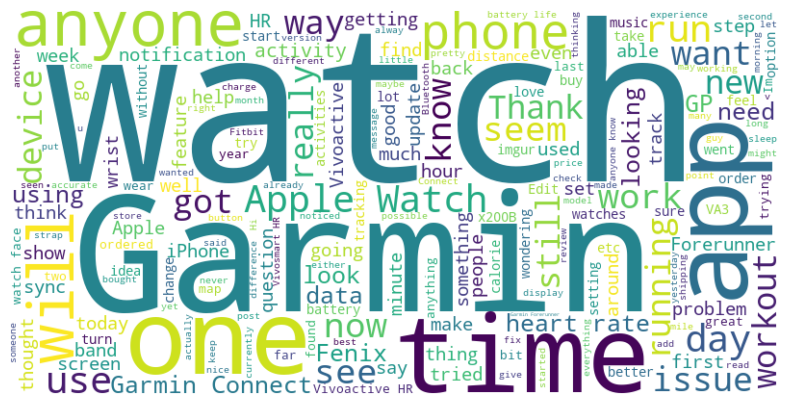

In [23]:
# Wordcloud before preprocessing
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine 'text' and 'title' columns for wordcloud generation
text_combined = ' '.join(watch_df['text'].tolist() + 
                         watch_df['title'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate(text_combined)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
watch_df.to_csv("../data/watch_df.csv", index=False)